In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("navjotkaushal/coffee-sales-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/coffee-sales-dataset


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from io import StringIO

df = pd.read_csv("/kaggle/input/coffee-sales-dataset/Coffe_sales.csv")
df.head(5)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [ ]:
df.shape

(3547, 11)

In [ ]:
df.isnull().sum()

,0
hour_of_day,0
cash_type,0
money,0
coffee_name,0
Time_of_Day,0
Weekday,0
Month_name,0
Weekdaysort,0
Monthsort,0
Date,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
print(df['coffee_name'].unique())

['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']


In [ ]:
best_menu = df['coffee_name'].value_counts()
print(best_menu)

coffee_name
Americano with Milk    809
Latte                  757
Americano              564
Cappuccino             486
Cortado                287
Hot Chocolate          276
Cocoa                  239
Espresso               129
Name: count, dtype: int64


# **1. Sales by Coffee Type**

In [ ]:
df['DateTime'] = pd.to_datetime(df['Date'])
df['DateTime']

,DateTime
0,2024-03-01
1,2024-03-01
2,2024-03-01
3,2024-03-01
4,2024-03-01
...,...
3542,2025-03-23
3543,2025-03-23
3544,2025-03-23
3545,2025-03-23


In [ ]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,DateTime
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000,2024-03-01
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000,2024-03-01
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000,2024-03-01
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000,2024-03-01
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000,2024-03-01


In [ ]:
coffee_sales = df.groupby('coffee_name').agg({
    'money': ['count', 'sum', 'mean']
}).round(2)
coffee_sales.columns = ['Quantity_Sold', 'Total_Revenue', 'Average_Price']
coffee_sales = coffee_sales.sort_values('Quantity_Sold', ascending=False)

print("Top Selling Coffee Types:")
print(coffee_sales)

Top Selling Coffee Types:
                     Quantity_Sold  Total_Revenue  Average_Price
coffee_name                                                     
Americano with Milk            809       24751.12          30.59
Latte                          757       26875.30          35.50
Americano                      564       14650.26          25.98
Cappuccino                     486       17439.14          35.88
Cortado                        287        7384.86          25.73
Hot Chocolate                  276        9933.46          35.99
Cocoa                          239        8521.16          35.65
Espresso                       129        2690.28          20.85


/tmp/ipython-input-2744781016.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




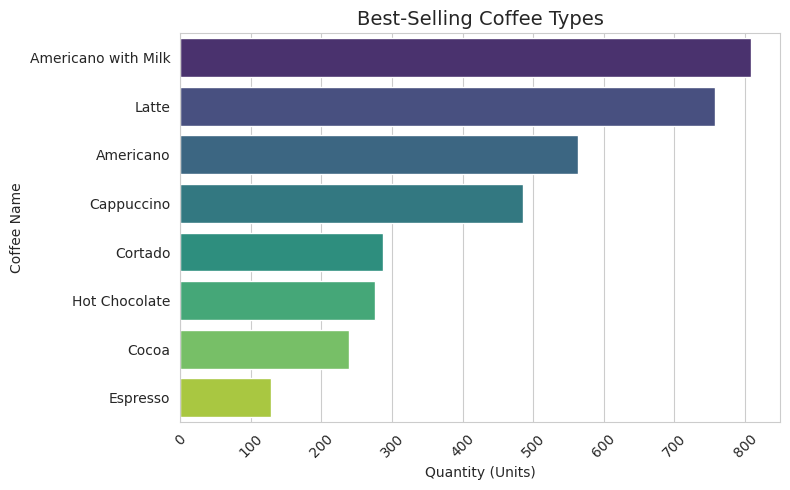

In [ ]:
# --- ใช้ Seaborn สร้าง Bar Plot ---

# ตั้งค่าขนาดกราฟ
plt.figure(figsize=(8, 5))

# สร้าง count plot โดยเรียงลำดับจากมากไปน้อย
sns.countplot(y='coffee_name', data=df, order=df['coffee_name'].value_counts().index, palette='viridis')

# ตั้งชื่อกราฟและแกน
plt.title('Best-Selling Coffee Types', fontsize=14)
plt.xlabel('Quantity (Units)', fontsize=10)
plt.ylabel('Coffee Name', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout() # จัดระเบียบข้อความไม่ให้ทับกัน
plt.show()

In [ ]:
print('Top Selling Coffee Types:', best_menu.idxmax(), best_menu.max(),'Units')

Top Selling Coffee Types: Americano with Milk 809 Units


# **2. Sales by Hour of Day (peak business hours)**

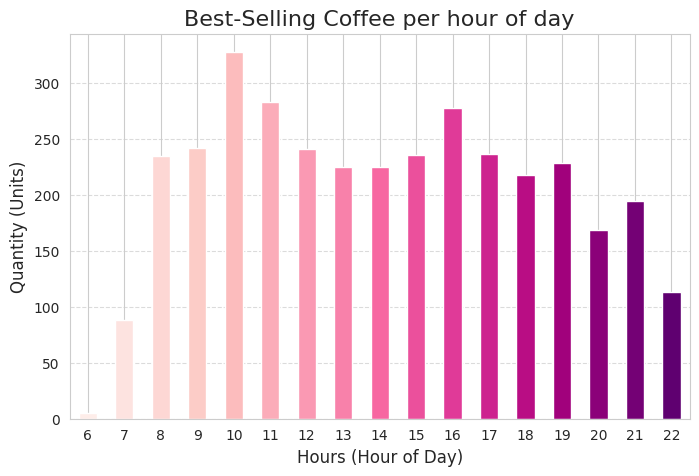

In [ ]:
# --- ใช้ Matplotlib สร้าง Bar Chart ---

# จัดกลุ่มข้อมูลตามชั่วโมงและนับจำนวน
sales_by_hour = df.groupby('hour_of_day')['money'].count().sort_index()

#1. สร้างชุดสีตามจำนวนแท่งกราฟที่มี
# sns.color_palette() คือคำสั่งสร้างชุดสี
# n_colors=len(sales_by_hour) คือการกำหนดให้สร้างสีตามจำนวนข้อมูลของเรา
colors = sns.color_palette("RdPu", n_colors=len(sales_by_hour))

# สร้างกราฟ
plt.figure(figsize=(8, 5))
sales_by_hour.plot(kind='bar', color = colors)

# ตั้งชื่อกราฟและแกน
plt.title('Best-Selling Coffee per hour of day', fontsize=16)
plt.xlabel('Hours (Hour of Day)', fontsize=12)
plt.ylabel('Quantity (Units)', fontsize=12)
plt.xticks(rotation=0) # ไม่ต้องหมุนแกน x
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **3. Sales by Time of Day (Morning vs Afternoon vs Night trends)**

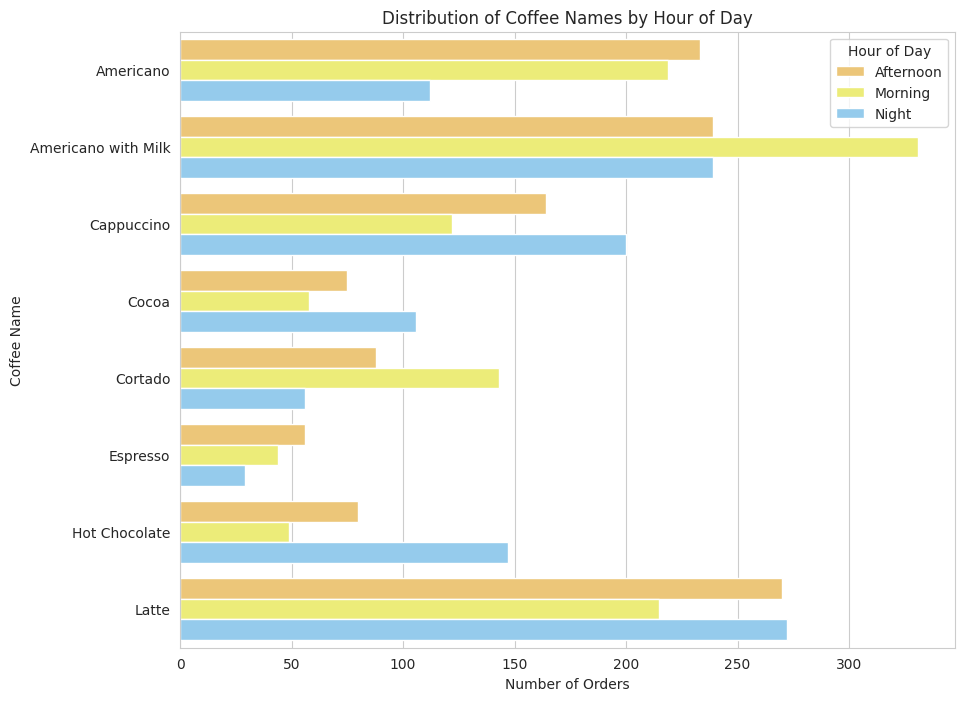

In [ ]:
# --- ใช้ Seaborn และ Matplotlib สร้างกราฟ ---

import matplotlib.pyplot as plt
import seaborn as sns

# 1. จัดกลุ่มข้อมูลเพื่อนับจำนวนกาแฟแต่ละชนิดในแต่ละช่วงเวลา
coffee_by_time_of_day = df.groupby(['Time_of_Day', 'coffee_name']).size().reset_index(name='count')

# 2. ตั้งค่าขนาดและสไตล์ของกราฟ
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid") # ตั้งสไตล์ให้มีเส้นกริดเพื่อดูง่ายขึ้น

# 3. สร้าง horizontal bar plot
custom_colors = {'Morning': '#FFFF66', 'Afternoon': '#FFCC66', 'Night': '#87CEFA'}
sns.barplot(
    x='count',
    y='coffee_name',
    hue='Time_of_Day',
    data=coffee_by_time_of_day,
    palette=custom_colors
)

plt.title('Distribution of Coffee Names by Hour of Day')
plt.xlabel('Number of Orders')
plt.ylabel('Coffee Name')
plt.legend(title='Hour of Day')
plt.show()


# **4. Sales by Weekday & Month (seasonal & weekly demand patterns)**

/tmp/ipython-input-3082947328.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




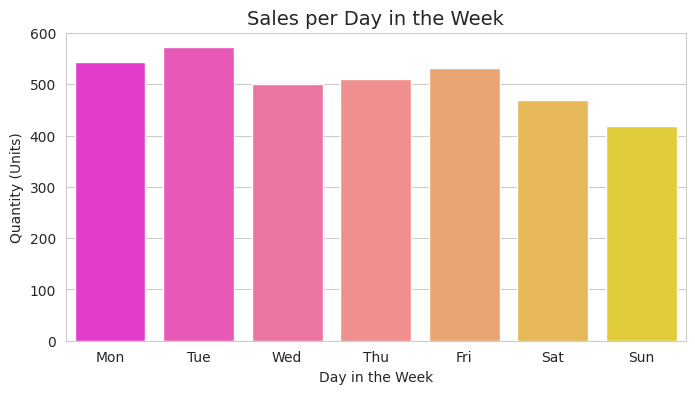

In [ ]:
# --- ใช้ Seaborn สร้าง Box Plot และ Bar Plot ---

# 4.1 ยอดขายตามวันในสัปดาห์
plt.figure(figsize=(8, 4))

# เรียงลำดับวันในสัปดาห์ให้ถูกต้อง
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.countplot(x='Weekday', data=df, order=weekday_order, palette='spring')
plt.title('Sales per Day in the Week', fontsize=14)
plt.xlabel('Day in the Week', fontsize=10)
plt.ylabel('Quantity (Units)', fontsize=10)
plt.show()

/tmp/ipython-input-184727067.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




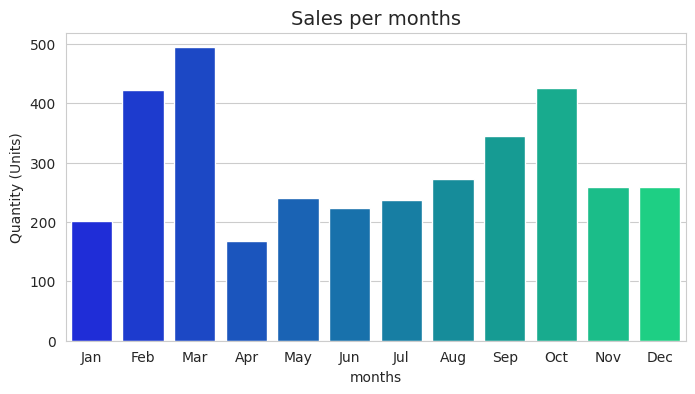

In [ ]:
# 4.2 ยอดขายตามเดือน
plt.figure(figsize=(8, 4))

# เรียงลำดับเดือนให้ถูกต้อง
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.countplot(x='Month_name', data=df, order=month_order, palette='winter')
plt.title('Sales per months', fontsize=14)
plt.xlabel('months', fontsize=10)
plt.ylabel('Quantity (Units)', fontsize=10)
plt.show()

# **5. Payment Method Breakdown (cash vs card usage)**

In [ ]:
# 1. ตรวจสอบค่าที่เป็นไปได้ทั้งหมดในคอลัมน์ 'cash_type'
payment_methods = df['cash_type'].unique()
print(f"All Observed Payment Types: {payment_methods}")

# 2. นับจำนวนรายการของแต่ละประเภทการชำระเงิน
payment_counts = df['cash_type'].value_counts()

# 3. สร้าง DataFrame เพื่อแสดงผลเป็นตารางสรุป
summary_table = pd.DataFrame({
    'All Observed Payment Types': payment_counts.index,
    'Transactions (Count)': payment_counts.values
})

# 4. คำนวณเปอร์เซ็นต์
total_transactions = len(df)
summary_table['percent (%)'] = (summary_table['Transactions (Count)'] / total_transactions) * 100

# 5. รูปแบบตารางที่ปรับแต่งความสวยงามด้วย tabulate
# ก่อนอื่นต้อง import ไลบรารี
from tabulate import tabulate

# แปลง DataFrame เป็นตารางโดยใช้ tabulate
# tablefmt สามารถเปลี่ยนเป็นรูปแบบอื่นๆ ได้ เช่น 'grid', 'simple', 'pipe', 'orgtbl'
fancy_table = tabulate(summary_table, headers='keys', tablefmt='fancy_grid', showindex=False)

print("\n--- Table Fancy Grid ---")
print(fancy_table)

All Observed Payment Types: ['card']

--- Table Fancy Grid ---
╒══════════════════════════════╤════════════════════════╤═══════════════╕
│ All Observed Payment Types   │   Transactions (Count) │   percent (%) │
╞══════════════════════════════╪════════════════════════╪═══════════════╡
│ card                         │                   3547 │           100 │
╘══════════════════════════════╧════════════════════════╧═══════════════╛


/tmp/ipython-input-184100540.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




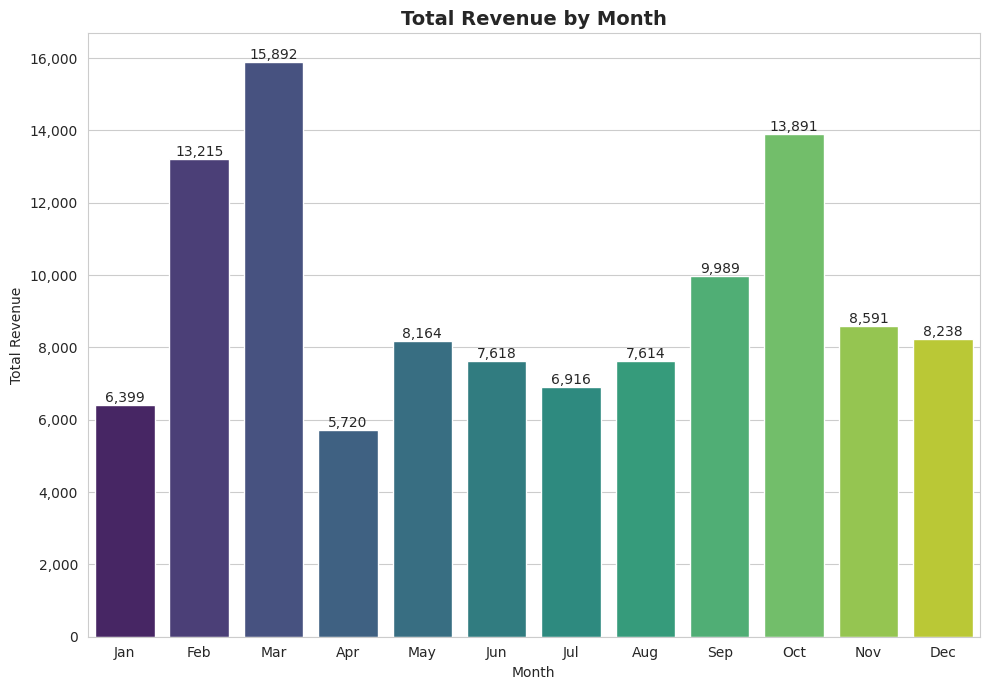

In [ ]:
# --- 3. การวิเคราะห์แนวโน้มรายได้รายเดือน (Monthly Revenue Trends) ---
import matplotlib.ticker as mticker

# จัดกลุ่มข้อมูลตามเดือน ('Monthsort', 'Month_name') และคำนวณผลรวมของ 'money'
# เราใช้ 'Monthsort' เพื่อให้เรียงลำดับเดือนถูกต้อง
monthly_revenue = df.groupby(['Monthsort', 'Month_name'])['money'].sum().reset_index()

# สร้างกราฟแท่งแสดงรายได้รายเดือน
fig, ax2 = plt.subplots(figsize=(10, 7))

sns.barplot(data=monthly_revenue, x='Month_name', y='money', ax=ax2, palette='viridis',
            order=monthly_revenue.sort_values('Monthsort')['Month_name'])
ax2.set_title('Total Revenue by Month', fontsize=14, weight='bold')
ax2.set_xlabel('Month', fontsize=10)
ax2.set_ylabel('Total Revenue', fontsize=10)
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}')) # ใส่ comma

# เพิ่มป้ายกำกับตัวเลขบนแท่งกราฟ
for container in ax2.containers:
    ax2.bar_label(container, fmt='{:,.0f}')

plt.tight_layout()
plt.show()


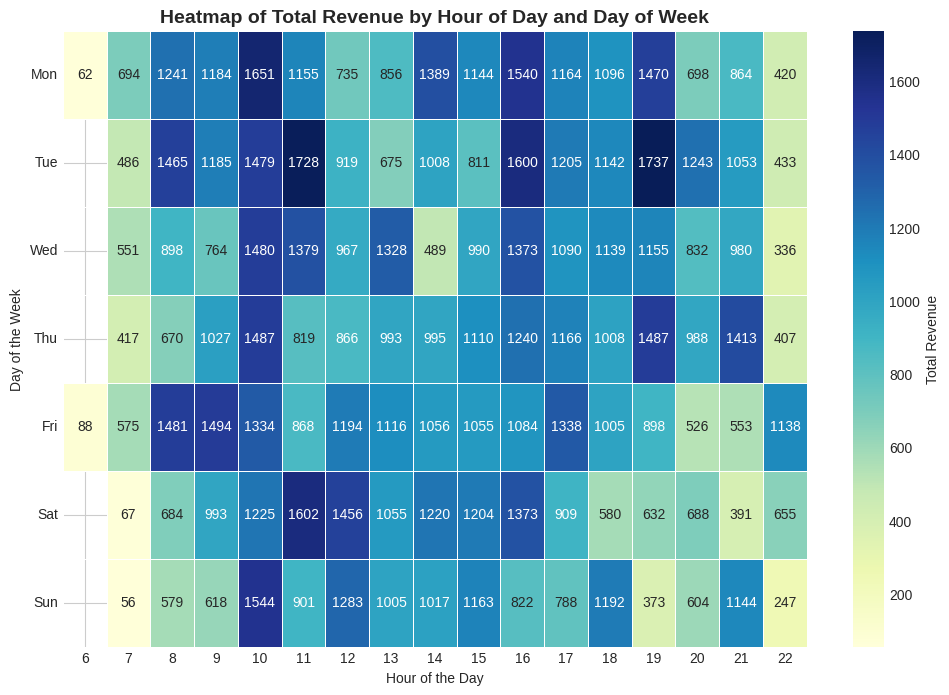

In [ ]:
# --- 3. สร้างกราฟ Heatmap ---

# Aggregate data by 'Weekday' and 'hour_of_day' and calculate the sum of 'money'
heatmap_data = df.groupby(['Weekday', 'hour_of_day'])['money'].sum().reset_index()

# Pivot the data to get 'Weekday' as index and 'hour_of_day' as columns
heatmap_data_pivot = heatmap_data.pivot(index='Weekday', columns='hour_of_day', values='money')

# Reindex the pivot table to ensure correct order of weekdays
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
heatmap_data_pivot = heatmap_data_pivot.reindex(weekday_order)

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data_pivot,
    cmap='YlGnBu',  # เลือกโทนสี (สีเข้มหมายถึงค่ามาก)
    annot=True,      # แสดงตัวเลขในแต่ละช่อง
    fmt='.0f',       # รูปแบบตัวเลขเป็นจำนวนเต็ม (ไม่มีทศนิยม)
    linewidths=.5,   # เพิ่มเส้นขอบระหว่างช่อง
    cbar_kws={'label': 'Total Revenue'} # ป้ายกำกับของแถบสี
)

plt.title('Heatmap of Total Revenue by Hour of Day and Day of Week', fontsize=14, weight='bold')
plt.xlabel('Hour of the Day', fontsize=10)
plt.ylabel('Day of the Week', fontsize=10)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

In [5]:
#print(df.to_markdown())